NULL HYPOTHESIS 5: Nations with lower gdp have higher drop out rates.

ALTERNATE HYPOTHESIS 5: Nations with lower gdp have lower drop out rates.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("white")
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/kartikjoshi267/afdbd38f1842037f4845237cba184e5d/raw/819a506fcb683f89d8584c3b170f45e04e5056a4/student_dropout_analysis.csv")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [4]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [5]:
dfCopy = df[df["Target"] != "Enrolled"]
dfCopy = dfCopy[dfCopy["Target"] != "Graduate"]
dfCopy

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout
12,1,1,2,16,1,1,1,13,27,5,...,0,6,0,0,0.000000,0,12.7,3.7,-1.70,Dropout
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4408,2,12,1,15,1,1,1,22,27,10,...,0,6,10,6,11.666667,0,12.7,3.7,-1.70,Dropout
4411,1,15,1,8,1,14,1,22,27,10,...,0,6,11,3,13.333333,0,13.9,-0.3,0.79,Dropout
4415,4,12,1,12,1,12,1,22,27,7,...,0,7,12,3,11.083333,0,11.1,0.6,2.02,Dropout
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout


In [6]:
dfCopy["Target"].unique()

array(['Dropout'], dtype=object)

In [7]:
for i, v in enumerate(dfCopy.columns):
  print(i, v)

0 Marital status
1 Application mode
2 Application order
3 Course
4 Daytime/evening attendance
5 Previous qualification
6 Nacionality
7 Mother's qualification
8 Father's qualification
9 Mother's occupation
10 Father's occupation
11 Displaced
12 Educational special needs
13 Debtor
14 Tuition fees up to date
15 Gender
16 Scholarship holder
17 Age at enrollment
18 International
19 Curricular units 1st sem (credited)
20 Curricular units 1st sem (enrolled)
21 Curricular units 1st sem (evaluations)
22 Curricular units 1st sem (approved)
23 Curricular units 1st sem (grade)
24 Curricular units 1st sem (without evaluations)
25 Curricular units 2nd sem (credited)
26 Curricular units 2nd sem (enrolled)
27 Curricular units 2nd sem (evaluations)
28 Curricular units 2nd sem (approved)
29 Curricular units 2nd sem (grade)
30 Curricular units 2nd sem (without evaluations)
31 Unemployment rate
32 Inflation rate
33 GDP
34 Target


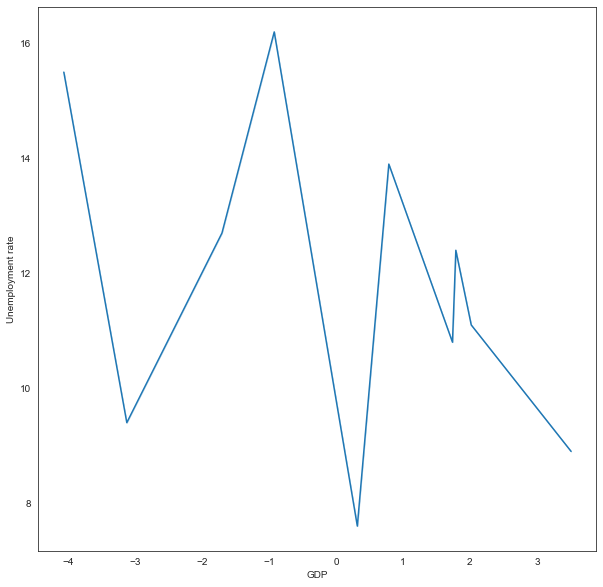

In [21]:
fig = plt.figure(1, (10,10))
sns.lineplot(y=dfCopy["Unemployment rate"], x=dfCopy["GDP"])
plt.show()

## Nations with lower gdp have higher rates of unemployment

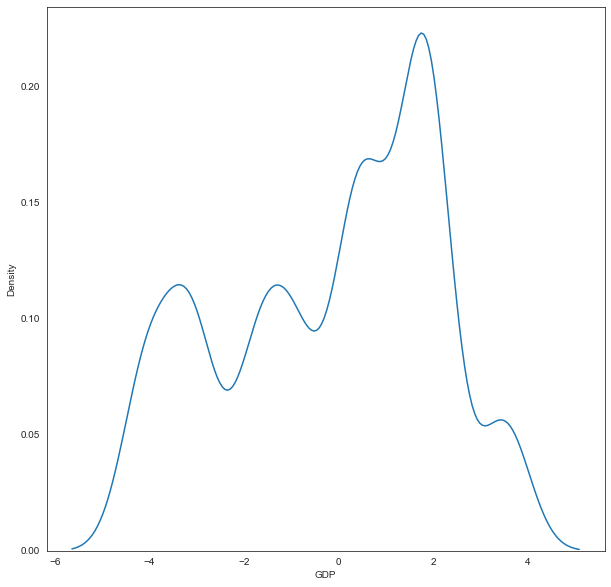

In [22]:
fig = plt.figure(1, (10,10))
sns.kdeplot(x=dfCopy["GDP"])
plt.show()

## NULL HYPOTHESIS HOLDS